## Python Tutorial: Part 2 - Numpy, Pandas, and Matplotlib

Here we will introduce Numpy, Pandas, and Matplotlib. Numpy is the core numerical computing package in Python, and its core type is ndarray. Pandas uses DataFrames (tables, much like R DataFrames) and Series (columns of a DataFrame) with powerful SQL-like queries. Matplotlib is a package for plotting, which uses a MATLAB-style syntax.

For a full course on Python, go here: https://github.com/cuttlefishh/python-for-data-analysis.

### Pandas

Pandas is a Python library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.

#### Library features

* DataFrame object for data manipulation with integrated indexing
* Tools for reading and writing data between in-memory data structures and different file formats
* Data alignment and integrated handling of missing data
* Reshaping and pivoting of data sets
* Label-based slicing, fancy indexing, and subsetting of large data sets
* Data structure column insertion and deletion
* Group-by engine allowing split-apply-combine operations on data sets
* Data set merging and joining
* Hierarchical axis indexing to work with high-dimensional data in a lower-dimensional data structure
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging

The library is highly optimized for performance, with critical code paths written in Cython or C.

#### Download Scripps Pier data

I copied data from http://www.sccoos.org/data/autoshorestations/autoshorestations.php?study=Scripps%20Pier and pasted it into Excel, then saved it as a CSV file. You can download [scripps_pier_20151110.csv](https://raw.githubusercontent.com/cuttlefishh/python-for-data-analysis/master/data/scripps_pier_20151110.csv) from GitHub.

#### Install packages

Install pandas, matplotlib, and seaborn using if you haven't already:

```
conda install pandas
conda install matplotlib
conda install seaborn
```

#### Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read data from CSV

In [2]:
data1 = pd.read_csv('scripps_pier_20151110.csv', index_col=None, header=0)

In [3]:
data1.head()

,Date,chl (ug/L),pres (dbar),sal (PSU),temp (C)
0,11/10/15 1:42,22.307,3.712,33.199,19.95
1,11/10/15 1:35,22.311,3.588,33.201,19.94
2,11/10/15 1:29,22.305,3.541,33.200,19.95
3,11/10/15 1:23,22.323,3.463,33.200,19.95
4,11/10/15 1:17,22.316,3.471,33.199,19.95


In [4]:
data2 = pd.read_csv('scripps_pier_20151110.csv', index_col=0, header=0)

In [5]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
11/10/15 1:42,22.307,3.712,33.199,19.95
11/10/15 1:35,22.311,3.588,33.201,19.94
11/10/15 1:29,22.305,3.541,33.200,19.95
11/10/15 1:23,22.323,3.463,33.200,19.95
11/10/15 1:17,22.316,3.471,33.199,19.95


In [6]:
data2.describe()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
count,66.000000,66.000000,66.000000,66.00000
mean,22.349576,3.041818,33.199318,20.06697
std,0.038988,0.254295,0.004959,0.06850
min,22.305000,2.714000,33.184000,19.94000
25%,22.319000,2.813250,33.197000,20.04000
50%,22.333500,2.997000,33.199000,20.07000
75%,22.385000,3.215500,33.203000,20.10500
max,22.426000,3.712000,33.206000,20.19000


#### Indexing in pandas

There are two ways to index a Pandas DataFrame.

* `loc` works on labels in the index.
* `iloc` works on the positions in the index (so it only takes integers).

#### With Date as the index column (data2)

In [7]:
data2.iloc[0]

chl (ug/L)     22.307
pres (dbar)     3.712
sal (PSU)      33.199
temp (C)       19.950
Name: 11/10/15 1:42, dtype: float64

In [8]:
data2['temp (C)'].head(10)

Date
11/10/15 1:42    19.95
11/10/15 1:35    19.94
11/10/15 1:29    19.95
11/10/15 1:23    19.95
11/10/15 1:17    19.95
11/10/15 1:11    19.95
11/10/15 1:05    19.96
11/10/15 0:59    19.99
11/10/15 0:53    20.00
11/10/15 0:47    20.01
Name: temp (C), dtype: float64

#### With no index column (data1)

In [9]:
data1.iloc[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [10]:
data1.loc[0]

Date           11/10/15 1:42
chl (ug/L)            22.307
pres (dbar)            3.712
sal (PSU)             33.199
temp (C)               19.95
Name: 0, dtype: object

In [11]:
data1['Date'].head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

In [12]:
data1.Date.head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

In [13]:
data1.iloc[:,0].head()

0    11/10/15 1:42
1    11/10/15 1:35
2    11/10/15 1:29
3    11/10/15 1:23
4    11/10/15 1:17
Name: Date, dtype: object

#### Convert date/time to timestamp object

In [14]:
time = pd.to_datetime(data1.iloc[:,0])
time.head()

0   2015-11-10 01:42:00
1   2015-11-10 01:35:00
2   2015-11-10 01:29:00
3   2015-11-10 01:23:00
4   2015-11-10 01:17:00
Name: Date, dtype: datetime64[ns]

In [15]:
type(time)

pandas.core.series.Series

### Matplotlib

[Matplotlib](https://matplotlib.org) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Check out the [Gallery](https://matplotlib.org/gallery/index.html) for examples of the kinds of plots you can create with Matplotlib.

#### Matplotlib plot method: Plot a single variable versus time

/Users/luke/miniconda3/envs/python3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


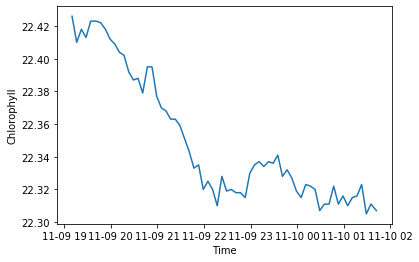

In [16]:
fig, ax = plt.subplots()
ax.plot(time, data1['chl (ug/L)'])
ax.set_xlabel('Time')
ax.set_ylabel('Chlorophyll')
fig.savefig('scripps_pier_Chlorophyll.pdf')

#### Matplotlib plot method: Plot each response variable in a loop

In [17]:
# rename the columns so they can be inserted as file names
data1.rename(columns={'chl (ug/L)': 'chlorophyll', 'pres (dbar)': 'pressure', 
                      'sal (PSU)': 'salinity', 'temp (C)': 'temperature'}, inplace=True)

In [18]:
# index is numerical starting from 0
data1.head()

,Date,chlorophyll,pressure,salinity,temperature
0,11/10/15 1:42,22.307,3.712,33.199,19.95
1,11/10/15 1:35,22.311,3.588,33.201,19.94
2,11/10/15 1:29,22.305,3.541,33.200,19.95
3,11/10/15 1:23,22.323,3.463,33.200,19.95
4,11/10/15 1:17,22.316,3.471,33.199,19.95


In [19]:
data1.columns

Index(['Date', 'chlorophyll', 'pressure', 'salinity', 'temperature'], dtype='object')

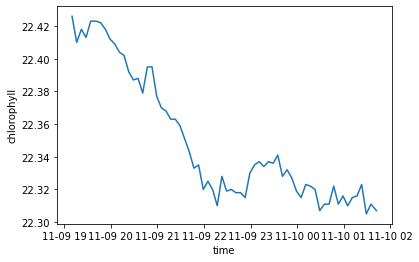

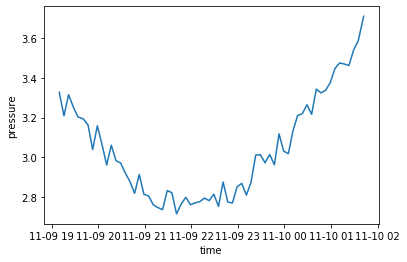

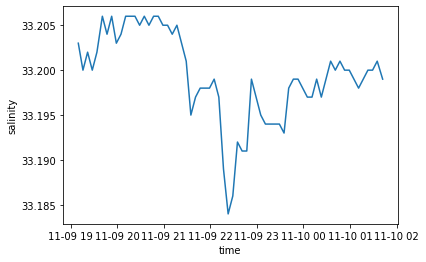

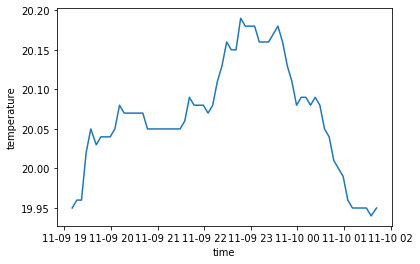

In [20]:
for col in data1.columns:
    if col != 'Date':
        fig = plt.figure()
        plt.plot(time, data1[col])
        plt.xlabel('time')
        plt.ylabel(col)
        fig.savefig('scripps_pier_%s.pdf' % col)

#### Pandas DataFrame plot method: Plot all response variables together

In [21]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
11/10/15 1:42,22.307,3.712,33.199,19.95
11/10/15 1:35,22.311,3.588,33.201,19.94
11/10/15 1:29,22.305,3.541,33.200,19.95
11/10/15 1:23,22.323,3.463,33.200,19.95
11/10/15 1:17,22.316,3.471,33.199,19.95


In [22]:
data2.index = pd.to_datetime(data2.index)

In [23]:
data2.head()

,chl (ug/L),pres (dbar),sal (PSU),temp (C)
Date,,,,
2015-11-10 01:42:00,22.307,3.712,33.199,19.95
2015-11-10 01:35:00,22.311,3.588,33.201,19.94
2015-11-10 01:29:00,22.305,3.541,33.200,19.95
2015-11-10 01:23:00,22.323,3.463,33.200,19.95
2015-11-10 01:17:00,22.316,3.471,33.199,19.95


<Figure size 432x288 with 0 Axes>

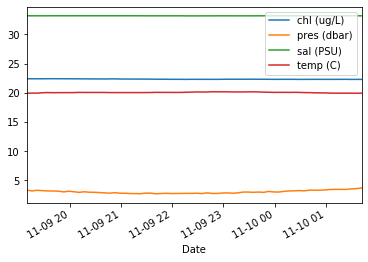

In [24]:
plt.figure()
data2.plot()
plt.legend(loc='best')
plt.savefig('scripps_pier_composite.pdf')

### Seaborn

[Seaborn](http://seaborn.pydata.org) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Check out the [Example Gallery](http://seaborn.pydata.org/examples/index.html) for examples of the kinds of plots you can create with Seaborn.

#### Example: Precipitation data from La Jolla, CA

Import the CSV file as a Pandas dataframe. By default, the index will start with zero and the header will be the first row of the csv file.

In [25]:
df = pd.read_csv('la_jolla_precip_daily.csv')

It's always good to take a quick look at your DataFrame.

In [26]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N",0.0,",,N"
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N",0.0,",,N"
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N",0.0,",,N"
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N",0.0,",,N"
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N",0.0,",,N"


In [27]:
# check dtypes
df.dtypes

STATION             object
NAME                object
LATITUDE           float64
LONGITUDE          float64
ELEVATION          float64
DATE                object
PRCP               float64
PRCP_ATTRIBUTES     object
SNOW               float64
SNOW_ATTRIBUTES     object
dtype: object

In [28]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [29]:
# check dtypes again
df.dtypes

STATION                    object
NAME                       object
LATITUDE                  float64
LONGITUDE                 float64
ELEVATION                 float64
DATE               datetime64[ns]
PRCP                      float64
PRCP_ATTRIBUTES            object
SNOW                      float64
SNOW_ATTRIBUTES            object
dtype: object

Alternatively, import the csv file with parse_dates set to the columns you want to parse as datetime.

In [30]:
df = pd.read_csv('la_jolla_precip_daily.csv', parse_dates=['DATE'])

What was the maximum daily precipitation (in inches) during this time period and when was it?

In [31]:
df['PRCP'].max()

3.35

In [32]:
# One way to get information about the maximum precipitation date.
df[df['PRCP'] == df['PRCP'].max()]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES
663,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2010-12-22,3.35,",,N",NaN,NaN


In [33]:
# Another way to get information about the max precipitation value.
df.loc[df['PRCP'].idxmax()]

STATION                       US1CASD0030
NAME               LA JOLLA 2.1 SE, CA US
LATITUDE                          32.8257
LONGITUDE                         -117.25
ELEVATION                           149.7
DATE                  2010-12-22 00:00:00
PRCP                                 3.35
PRCP_ATTRIBUTES                       ,,N
SNOW                                  NaN
SNOW_ATTRIBUTES                       NaN
Name: 663, dtype: object

Create columns for 'YEAR', 'MONTH', 'DAY', and 'DAY_OF_YEAR'. Hint: use attributes such as the .year attribute, or use a regular expression, with a list comprehension.

In [34]:
df['YEAR'] = [x.year for x in df.DATE]
df['MONTH'] = [x.month for x in df.DATE]
df['DAY'] = [x.day for x in df.DATE]
df['DAY_OF_YEAR'] = [x.dayofyear for x in df.DATE]

In [35]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,YEAR,MONTH,DAY,DAY_OF_YEAR
0,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-18,0.0,",,N",0.0,",,N",2009,2,18,49
1,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-19,0.0,",,N",0.0,",,N",2009,2,19,50
2,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-20,0.0,",,N",0.0,",,N",2009,2,20,51
3,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-21,0.0,",,N",0.0,",,N",2009,2,21,52
4,US1CASD0030,"LA JOLLA 2.1 SE, CA US",32.8257,-117.2501,149.7,2009-02-22,0.0,",,N",0.0,",,N",2009,2,22,53


Plot precipitation versus day of year for each year separately, with each year as a different colored line, the x-axis going from the beginning to the end of the year, and a legend indicating the year.

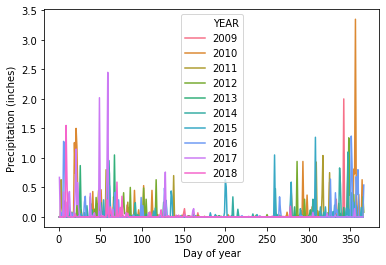

In [36]:
# Seaborn lineplot
fig, ax = plt.subplots()
sns.lineplot(x='DAY_OF_YEAR', y='PRCP', hue='YEAR', palette=sns.color_palette("husl", 10), ax=ax, data=df)
ax.set_xlabel('Day of year')
ax.set_ylabel('Precipitation (inches)')
fig.savefig('precipitation_by_year.pdf')

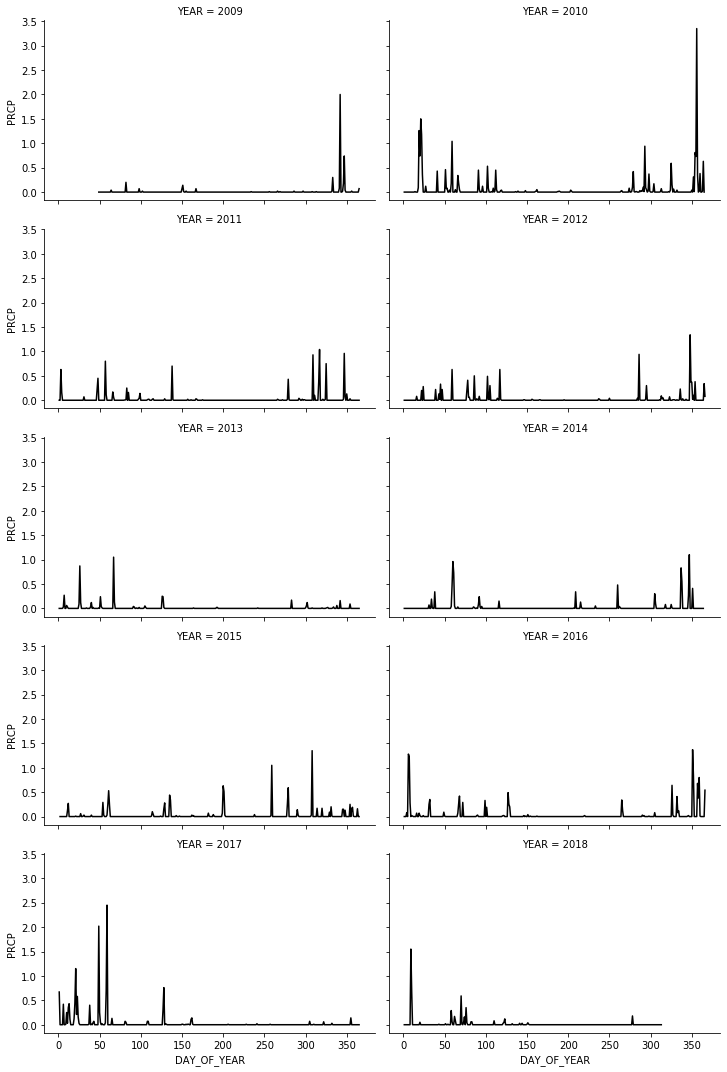

In [37]:
# Seaborn relplot with facets
sns.relplot(x='DAY_OF_YEAR', y='PRCP', col='YEAR', col_wrap=2, color='k',
            height=3, aspect=1.7, linewidth=1.5, kind='line', data=df)
plt.savefig('precipitation_by_year_grid.pdf')

Plot a histogram with kernel density and rugplot with the Seaborn function distplot.

/Users/luke/miniconda3/envs/python3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


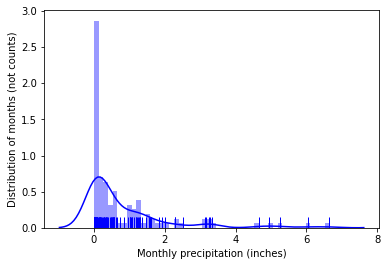

In [38]:
# Seaborn distplot
sns.distplot(df.groupby(['YEAR', 'MONTH']).sum().PRCP, color='b', bins=50, rug=True, kde=True)
plt.xlabel('Monthly precipitation (inches)')
plt.ylabel('Distribution of months (not counts)');

Use groupby to group the data by year or by month. Which year was the rainiest? Which month was the rainiest?

In [39]:
df.groupby(['YEAR'], as_index=False).mean().sort_values('PRCP')

,YEAR,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,MONTH,DAY,DAY_OF_YEAR
4,2013,32.8257,-117.2501,149.7,0.012755,0.0,6.501377,15.688705,182.214876
0,2009,32.8257,-117.2501,149.7,0.013439,0.0,7.321656,16.006369,207.334395
9,2018,32.8257,-117.2501,149.7,0.015595,0.0,5.655949,15.418006,156.167203
5,2014,32.8257,-117.2501,149.7,0.022857,0.0,6.510989,15.678571,182.500000
2,2011,32.8257,-117.2501,149.7,0.026022,0.0,6.565826,15.647059,184.137255
6,2015,32.8257,-117.2501,149.7,0.027775,0.0,6.541209,15.760989,183.500000
3,2012,32.8257,-117.2501,149.7,0.028000,0.0,6.477778,15.627778,182.272222
7,2016,32.8257,-117.2501,149.7,0.035656,0.0,6.513661,15.756831,183.500000
8,2017,32.8257,-117.2501,149.7,0.037022,0.0,6.463483,15.966292,181.331461
1,2010,32.8257,-117.2501,149.7,0.057214,0.0,6.523677,15.841226,183.036212


In [40]:
df.groupby(['MONTH'], as_index=False).mean().sort_values('PRCP')

,MONTH,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,YEAR,DAY,DAY_OF_YEAR
7,8,32.8257,-117.2501,149.7,0.001194,0.0,2013.500000,16.000000,228.200000
5,6,32.8257,-117.2501,149.7,0.002391,0.0,2013.545455,15.444444,166.646465
6,7,32.8257,-117.2501,149.7,0.006097,0.0,2013.500000,16.000000,197.200000
8,9,32.8257,-117.2501,149.7,0.007930,0.0,2013.456140,15.954386,259.164912
4,5,32.8257,-117.2501,149.7,0.017143,0.0,2013.516234,15.912338,136.113636
3,4,32.8257,-117.2501,149.7,0.018567,0.0,2013.500000,15.500000,105.700000
9,10,32.8257,-117.2501,149.7,0.019935,0.0,2013.470779,16.016234,289.217532
2,3,32.8257,-117.2501,149.7,0.031656,0.0,2013.516234,15.964286,75.165584
10,11,32.8257,-117.2501,149.7,0.032419,0.0,2013.162455,15.115523,319.332130
1,2,32.8257,-117.2501,149.7,0.055097,0.0,2013.857143,14.957529,45.957529


Make boxplots by year and by month using the Seaborn function boxplot.

In [41]:
df_mean_by_month = df.groupby(['YEAR', 'MONTH'], as_index=False).mean()

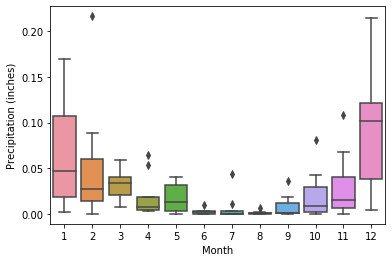

In [42]:
# Seaborn boxplot by month
sns.boxplot(x='MONTH', y='PRCP', data=df_mean_by_month)
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)');

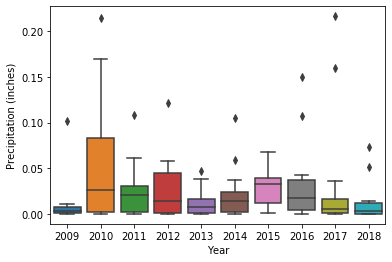

In [43]:
# Seaborn boxplot by year
sns.boxplot(x='YEAR', y='PRCP', data=df_mean_by_month)
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)');

Use pivot_table to produce a new DataFrame, where rows=years and columns=months, containing the mean precipitation of each month.

In [44]:
precip = df.pivot_table(index='YEAR', columns='MONTH', values='PRCP', aggfunc='mean')

In [45]:
precip

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2009,NaN,0.000000,0.007742,0.003000,0.006774,0.003704,0.000000,0.000323,0.001333,0.001290,0.011333,0.101613
2010,0.169677,0.088462,0.020000,0.064333,0.001935,0.002667,0.003548,0.000000,0.001923,0.080968,0.032333,0.214516
2011,0.027742,0.061538,0.022414,0.010000,0.025517,0.003000,0.000000,0.000000,0.001429,0.018065,0.108000,0.039032
2012,0.018065,0.057778,0.041613,0.053333,0.000645,0.001667,0.000323,0.001613,0.001333,0.042258,0.010000,0.121852
2013,0.047419,0.017143,0.038065,0.006000,0.016452,0.000333,0.001290,0.000323,0.000000,0.011613,0.002857,0.010000
2014,0.002258,0.037500,0.059032,0.018000,0.000000,0.000000,0.011290,0.006452,0.018000,0.000000,0.019333,0.105333
2015,0.016667,0.013571,0.032903,0.005333,0.040645,0.002000,0.044194,0.001290,0.035667,0.033226,0.067333,0.038710
2016,0.107419,0.015517,0.035161,0.018333,0.033226,0.000667,0.000000,0.000968,0.015667,0.004839,0.042667,0.150000
2017,0.160000,0.216429,0.008065,0.004667,0.036129,0.009667,0.000323,0.000968,0.000476,0.000000,0.005667,0.004516


Draw a heatmap of years x months where each square is a month colored by mean precipitation. Adjust the colormap to highlight months with heavy precipitation.

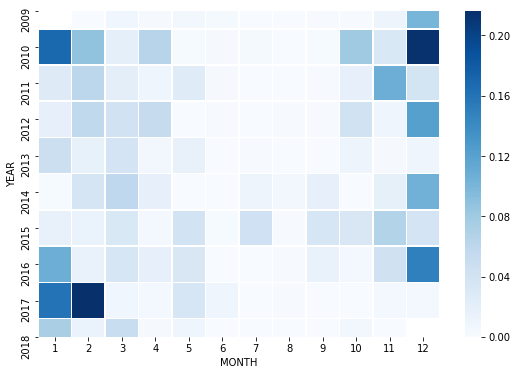

In [46]:
# Heatmap colored by precipitation
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(precip, annot=False, fmt='f', linewidths=.5, ax=ax, cmap='Blues');